<a href="https://colab.research.google.com/github/mrospond/kik/blob/main/W04_KiK_kody_kana%C5%82owe_wst%C4%99p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Potrzebne biblioteki...

# Rysowanie standardowych wykresów
import matplotlib.pyplot as plt
# Obróbka statystyczna przy rysowaniu wykresów i formatowaniu ich wyglądu
import seaborn as sns
sns.set()

# Obliczenia matematyczne
import math

# Praca z wektorami i macierzami
import numpy as np

# Eleganckie formatowanie wyświetlanych danych
import pprint

# Obliczenia probabilistyczne
## Entropia
from scipy.stats import entropy
## Dowolny rozkład dyskretny
from scipy.stats import rv_discrete
## Rozkład dwumianowy (Bernoulliego)
from scipy.stats import binom

# Zliczanie znaków w ciągu
from collections import Counter

# AEP: *asymptotic equipartition property*

Zobaczmy sekwencje typowe dla danej entropii źródła binarnego

In [ ]:
#@title { run: "auto" }

#@markdown Prawdopodobieństwo pojawienia się $1$:
p1 = 0.1  #@param {type: "slider", min:0, max:0.5, step:0.01}

prawd = np.array([p1, 1-p1])
H = entropy(prawd, base = 2)
print(f'Entropia H({p1},{1-p1}) = {H}')

#@markdown Długość sekwencji: $k$
k = 1000 #@param {type:"integer"}

ile_wszystkich = 2**k
ile_typ = 2**(k*H)
prawd_typ = 1/ile_typ

print(f"Liczba możliwych sekwencji: {ile_wszystkich}.\nLiczba typowych sekwencji: {ile_typ}.\nPrawdopodobieństwo pojedynczej typowej sekwencji: {prawd_typ}")

custm = rv_discrete(values=([1,0], prawd))

#@markdown Przykładowe sekwencje: efekt próbkowania podanego rozkładu dwupunktowego

for _ in range(20):
  sekwencja = custm.rvs(size=k)
  print(sekwencja)
  ile_zer = Counter(sekwencja)[0]
  ile_jedynek = Counter(sekwencja)[1]
  print(f"Liczba zer: {ile_zer}. Liczba jedynek: {ile_jedynek}.")

Entropia H(0.1,0.9) = 0.46899559358928117
Liczba możliwych sekwencji: 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376.
Liczba typowych sekwencji: 1.519642757520506e+141.
Prawdopodobieństwo pojedynczej typowej sekwencji: 6.580493968408927e-142
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Prawdopodobieństwo, że przy Pr_1=0.1
w sekwencji o długości 1000 będzie:
3 jedynek i 997 zer 
wynosi: 3.98406752105618e-41


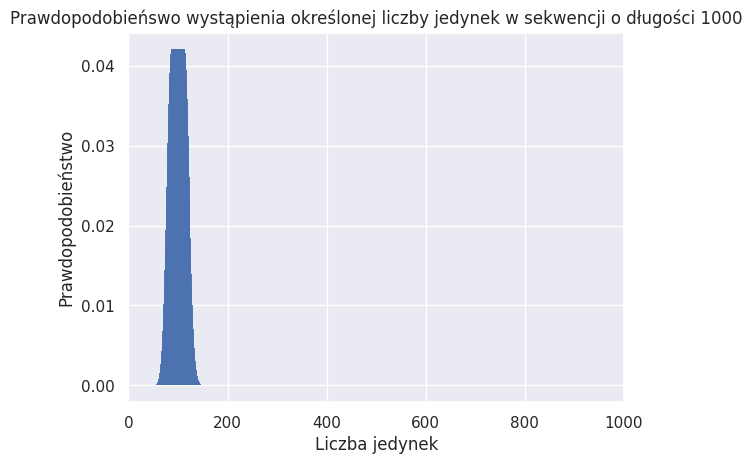

In [ ]:
#@title { run: "auto" }
#@markdown * Jakie prawdopodobieństwo konkretnej sekwencji?
#@markdown * Zakładamy entropię $H$ i określoną liczbę jedynek w sekwencji o długości $k$
#@markdown * Znowu rozkład Bernoulliego $\Pr\{\mathit{ile_1}\} = \binom{k}{\mathit{ile_1}}p_1^{\mathit{ile_1}}p_0^{\mathit{ile_0}}$

#@markdown Liczba jedynek w sekwencji
ile_1 = 3 #@param {type:"integer"}

assert ile_1 <= k, "Liczba jedynek nie może przekraczać k"

ile_0 = k - ile_1

binom_dist = binom(k,p1)

print(f"Prawdopodobieństwo, że przy Pr_1={p1}\nw sekwencji o długości {k} będzie:\n{ile_1} jedynek i {ile_0} zer \nwynosi: {binom_dist.pmf(ile_1)}")

xmin=0
xmax=k
ile_j = range(xmin,xmax+1)

prawd = binom_dist.pmf(ile_j)

plt.figure()
plt.vlines(ile_j,0,prawd,linewidth=10)
plt.title(f"Prawdopodobieńswo wystąpienia określonej liczby jedynek w sekwencji o długości {k}")
plt.xlim(xmin-0.5,xmax+0.5)
plt.xlabel("Liczba jedynek")
plt.ylabel("Prawdopodobieństwo")
plt.show()

# Odległość Hamminga

Po prostu zliczamy na ilu pozycjach różnią się ciągi binarne.

In [ ]:
#@title { run: "auto" }
#@markdown Obliczanie odległości Hamminga

slowo_1 = "1111111" #@param {type:"string"}
slowo_2 = "1010110" #@param {type:"string"}

assert len(slowo_1) == len(slowo_2), "Słowa muszą być tej samej długości!"

def hamming_distance(x, y, show=False):
  x1 = np.array([int(c) for c in x])
  x2 = np.array([int(c) for c in y])
  different = np.array(x1 != x2)
  if show:
    print(f"Pozycje różnic: {different}")
  return np.count_nonzero(different)

d = hamming_distance(slowo_1, slowo_2, True)
print(f"Odległość Hamminga między {slowo_1} i {slowo_2}: {d}")

Pozycje różnic: [False  True False  True False False  True]
Odległość Hamminga między 1111111 i 1010110: 3


## Odległość Lee

Dla kodów niebinarnych może nas interesować nie tylko różnica, ale też na ile różnią się poszczególne symbole alfabetu. Przydaje się do tego specjalna [odległość Lee](https://en.wikipedia.org/wiki/Lee_distance). To nie jest po prostu zliczanie, na ilu pozycjach różnią się wartości i jak bardzo (bo zakłada się cykliczność wartości).

In [ ]:
#@title { run: "auto" }
#@markdown Obliczanie odległości Lee 

slowo_1 = "4031" #@param {type:"string"}
slowo_2 = "0022" #@param {type:"string"}

#@markdown Zakładamy alfabet $\{0,1,\dots,q-1\}$
q = 5 #@param {type:"integer"}

assert len(slowo_1) == len(slowo_2), "Słowa muszą być tej samej długości!"

def lee_distance(x,y):
  x1 = np.array([int(c) for c in x])
  x2 = np.array([int(c) for c in y])
  a = np.abs(x1-x2)
  # print(a)
  b = q-np.abs(x1-x2)
  # print(b)
  return np.sum(np.minimum(a,b))

print(f"Liczba różnych pozycji między {slowo_1} i {slowo_2}: {hamming_distance(slowo_1, slowo_2)}")
print(f"Odległość Lee między {slowo_1} i {slowo_2} przy alfabecie 0,...,{q-1}: {lee_distance(slowo_1, slowo_2)}")

Liczba różnych pozycji między 4031 i 0022: 3
Odległość Lee między 4031 i 0022 przy alfabecie 0,...,4: 3


Teraz pytanie: po co nam odległość Hamminga?

# Reguła największej wiarygodności w związku z dekodowaniem

Mamy $2^k$ wiadomości na wejściu i $2^n$ wiadomości na wyjściu binarnego kanału symetrycznego o prawdopodobieństwie przekłamania $p_{\text{err}}$.

Jak znaleźć prawdopodobieństwo przekłamania się jednego ciągu kodowego w inny?

$$p_{\text{err}}^{d(\mathbf{x},\mathbf{y})}(1-p_{\text{err}})^{n-d(\mathbf{x},\mathbf{y})}$$

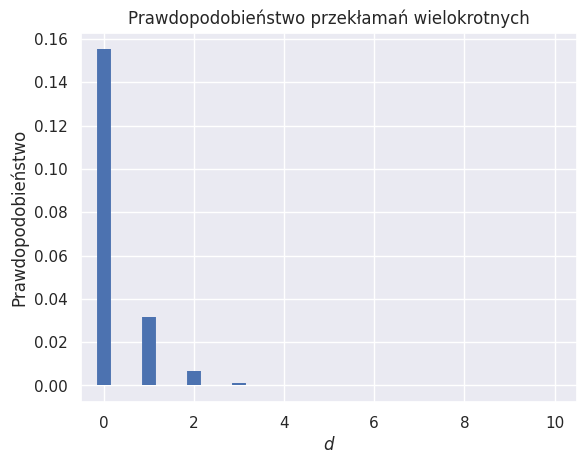

In [ ]:
#@title { run: "auto" }
#@markdown Prawdopodobieństwo przekłamania się jednej wiadomości $\mathbf{x}$ w inną $\mathbf{y}$ w zależności od odległości Hamminga $d(\mathbf{x},\mathbf{y})$ między nimi

n = 10 #@param {type:"integer"}
p_err = 0.17 #@param {type:"slider", min:0.1, max:1.0, step:0.01}

d = np.arange(n+1)
P = np.power(p_err, d)*np.power(1-p_err, n-d)

plt.figure()
plt.vlines(d,0,P,linewidth=10)
plt.title('Prawdopodobieństwo przekłamań wielokrotnych')
plt.xlabel(f'$d$')
plt.ylabel('Prawdopodobieństwo')
plt.show()

W praktyce interesują nas sytuacje, gdy $p_{\text{err}} = \mathit{BER} \ll \frac{1}{2}$, ale warto zaobserwować różne sytuacje:
*   $p_{\text{err}} \rightarrow 0$.
*   $p_{\text{err}} \rightarrow 1$.
*   $p_{\text{err}} \rightarrow \frac{1}{2}$.

# Kodowanie kanałowe: kody blokowe

Kod blokowy dla kodu o parametrach:

$$ (n,k) $$

polega na utworzeniu słowa kodowego o długości

$$ n \text{ symboli} $$

na podstawie ciągu informacyjnego liczącego

$$ k \text{ symboli} $$

Kodowany ciąg symboli jest dzielony na bloki po $k$ symboli i każdy jest niezależnie zastępowany odpowiednim blokiem po $n$ symboli.

W związku z tym, że słowa kodowe mogą reprezentować wszystkie możliwe kombinacje symboli w ciągu informacyjnym, to różnych słów w kodzie jest $2^k$. Ale wszystkich ciągów o długości $n$ jest $2^n$, zatem przeważająca część ciągów o długości $n$ reprezentuje sytuację, w której nastąpiło przekłamanie (to skutkuje ciągami zabronionymi, ale przecież przekłamania mogą też prowadzić do przekształcenie jednego ciągu kodowego w inny ciąg kodowy!).

## Kodowanie detekcyjne

Kody detekcyjne umożliwiają jedynie wykrywanie, że w ciągu o długości $n$ symboli nastąpiło przekłamanie. Szczególnie w przypadku kodów o niewielkiej długość $d_{\min}$ (np. $d_{\min}=2$): zgodnie z regułą największej wiarygodności, gdybyśmy zgadywali, jaki ciąg kodowy został przekłamany, to mamy kilku równorzędnych kandydatów i nie możemy podjąć decyzji (dlatego nie stosujemy korekcji).

### Kod z kontrolą parzystości

Zapewne najbardziej popularnym kodem detekcyjnym jest kod z kontrolą parzystości. Ma parametry:

$$ (n, n-1) \quad \text{tj.} \quad n = k+1$$

Kodowanie jest bardzo proste: do $n-1 = k$ symboli tworzących ciąg informacyjny dodaje się jeden symbol kontrolny w taki sposób, żeby w całym ciągu $n$ symboli była parzysta liczba jedynek. W ten sposób, jeśli wystąpi jedno przekłamanie na dowolnym z $n$ symboli w bloku, będzie wiadomo, że nastąpiło przekłamanie, bo liczba jedynek będzie nieparzysta.

Jak automatycznie wyliczać bit kontrolny? Zobaczmy, że bit kontrolny ma być 0, jeśli tylko symbole informacyjne zawierają parzystą liczbę 1, a takie coś "wykrywa" dodawanie XOR:

$$x_1 \oplus x_2 \oplus x_3 \oplus \dots \oplus x_{n-1} = x_n$$

Kod z kontrolą parzystości o parametrach $(n, n-1)$ pozwala nam bezbłędnie wykrywać wszystkie przekłamania o krotności $s = 1$. Można też wykrywać inne przekłamania nieparzyste, ale na pewno nie wiemy, gdzie one występują.

In [ ]:
#@title Jak to działa w przypadku kodu z kontrolą parzystości? { run: "auto" }

#@markdown Wprowadź ciąg binarny:
slowo = '101100' #@param {type:"string"}

k = len(slowo)
n = k+1

u = np.array([int(c) for c in slowo])
x = np.append(u, np.sum(u)%2)
print(f"Kod z kontrolą parzystości z parametrami ({n},{k}): ")
print(f"Ciąg informacyjny {u} kodowany jako {x}")

Kod z kontrolą parzystości z parametrami (7,6): 
Ciąg informacyjny [1 0 1 1 0 0] kodowany jako [1 0 1 1 0 0 1]


In [ ]:
#@title Detekcja przekłamania w kodzie z kontrolą parzystości { run: "auto" }

slowo = '1011001' #@param {type:"string"}

u = np.array([int(c) for c in slowo])

if (np.sum(u)%2 > 0):
  print("Gdzieś wystąpiło przekłamanie!")
else:
  print("Nie można stwierdzić przekłamania, ale to nie znaczy, że go nie było!")

Nie można stwierdzić przekłamania, ale to nie znaczy, że go nie było!


Warto sprawdzić przekłamania na różnych pozycjach i w różnej liczbie...

In [ ]:
#@title Kiedy dokonamy niepoprawnej detekcji dla kodu z kontrolą parzystości? { run: "auto" }
#@markdown * Pierwsze przybliżenie: będzie lepiej niż "wyłapywanie" wszystkich przekłamań jednokrotnych
#@markdown * Dokładnie: "wyłapiemy" wszystkie przekłamania o krotności nieparzystej z rozkładu Bernoulliego (a pomylimy się na krotnościach parzystych): $$1-\sum_{i = 1}^{\lfloor{\frac{n-1}{2}\rfloor}}{\binom{n}{2i} p_{\text{err}}^{2i}(1-p_{\text{err}})^{n-2i}}$$

#@markdown Liczba bitów w słowie kodowym kodu z kontrolą parzystości:
n = 93 #@param {type:"slider", min:1, max:100, step:1}

#@markdown Prawdopodobieństwo przekłamania pojedynczego bitu
p_err = 0.02 #@param {type:"slider", min:0.01, max:1.0, step:0.01}

binom_dist = binom(n=n, p=p_err)

print(f"Kod z kontrolą parzystości o długości słowa {n}:\n")
print(f"Poprawna detekcja błędów dla przekłamań o krotności: ")
sum_p = 0
for i in range(0,n+1):
  if i%2 == 1:
    pr_i = binom_dist.pmf(i)
    sum_p += pr_i
    print(f"{i} (prawd. {pr_i})")
print(f"\nCzyli co najmniej {binom_dist.pmf(1)} (ograniczenie dolne dla {sum_p}).")

Kod z kontrolą parzystości o długości słowa 93:

Poprawna detekcja błędów dla przekłamań o krotności: 
1 (prawd. 0.2899425191467202)
3 (prawd. 0.16849915106874502)
5 (prawd. 0.02810658475761452)
7 (prawd. 0.002133872919064442)
9 (prawd. 9.023214307904769e-05)
11 (prawd. 2.381956387668463e-06)
13 (prawd. 4.223922277815322e-08)
15 (prawd. 5.294458419268313e-10)
17 (prawd. 4.8690676167598245e-12)
19 (prawd. 3.379888669137696e-14)
21 (prawd. 1.8105708524902323e-16)
23 (prawd. 7.618398623375008e-19)
25 (prawd. 2.55427359092747e-21)
27 (prawd. 6.904335017262269e-24)
29 (prawd. 1.5192559967857795e-26)
31 (prawd. 2.7433193960582226e-29)
33 (prawd. 4.0920583736780044e-32)
35 (prawd. 5.069976670371978e-35)
37 (prawd. 5.240979069109638e-38)
39 (prawd. 4.536519458788754e-41)
41 (prawd. 3.2972843355546575e-44)
43 (prawd. 2.016601161912261e-47)
45 (prawd. 1.0392708523563505e-50)
47 (prawd. 4.516686970384159e-54)
49 (prawd. 1.6556207498390703e-57)
51 (prawd. 5.116225198153556e-61)
53 (prawd. 1.331408

Gdy długość słowa rośnie, a prawdopodobieństwo przekłamania robi się mniejsze, tym bardziej ograniczenie wynikające z przekłamania jednokrotnego będzie bliższe rzeczywistości.

## Kodowanie korekcyjne

Kody korekcyjne służą nie tylko do wykrywania przekłamań, ale też do korygowania niektórych z nich.

### Kod z powtarzaniem

Najbardziej prymitywny kod korekcyjny to kod z powtarzaniem. Polega na $(n-1)$-krotnym powtórzeniu symbolu, tzn. na jeden bit informacyjny przypada $n-1$ identycznych z nim bitów kontrolnych:

$$ x_1 = x_2 $$
$$ x_1 = x_3 $$
$$ x_1 = x_4 $$
$$ \vdots $$
$$ x_1 = x_n $$

czyli:

$$ x_1 \oplus x_2 = 0 $$
$$ x_1 \oplus x_3 = 0 $$
$$ x_1 \oplus x_4 = 0 $$
$$ \vdots $$
$$ x_1 \oplus x_n = 0 $$

Kod z powtarzaniem o parametrach $(n,1)$ pozwala nam bezbłędnie korygować wszystkie przekłamania aż do $t \leq \left\lfloor{\frac{n-1}{2}}\right\rfloor$-krotnych.

Najchętniej stosujemy nieparzyste $n = 2t + 1$, bo wtedy wiadomo, że krotność korygowalnych przekłamań to $t$.

In [ ]:
#@title Zobaczymy jak działa kod z powtarzaniem { run: "auto" }
#@markdown Przy dekodowaniu opieramy się na regule największej wiarygodności ML

#@markdown Liczba powtórzeń:
powt = 5 #@param {type:"integer"}

n = powt + 1
k1 = '1'*n
print(f"1 jest kodowane jako: {k1}")
k0 = '0'*n
print(f"0 jest kodowane jako: {k0}") 

#@markdown Potencjalnie przekłamane słowo o odpowiedniej długości:
slowo = '111010' #@param {type:"string"}

assert len(slowo) == n, f"Miało być długości {n}!"

x = np.array([int(c) for c in slowo])

if x.sum() == n/2:
  print(f"Nie można poprawnie zdekodować!")
elif x.sum() < n/2:
  print(f"Wygląda, że wysłano {k0}, zatem dekodujemy 0")
else:
  print(f"Wygląda, że wysłano {k1}, zatem dekodujemy 1")

1 jest kodowane jako: 111111
0 jest kodowane jako: 000000
Wygląda, że wysłano 111111, zatem dekodujemy 1


Kod z powtarzaniem:
	Długość słowa kodowego 9, czyli liczba powtórzeń 8.
	Liczba poprawnie korygowalnych przekłamań: 4.
	Sprawność kodu: 0.1111111111111111.


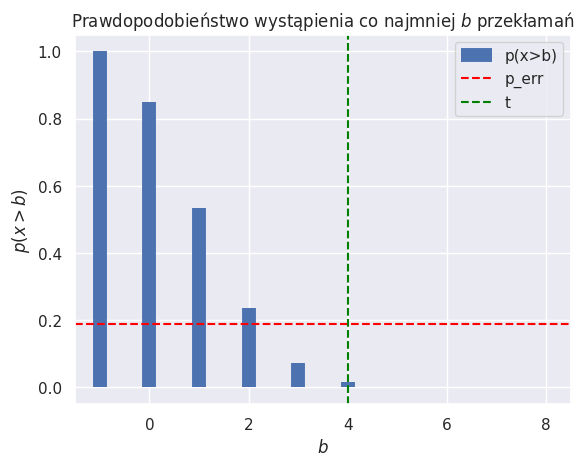

In [ ]:
#@title Prawdopodobieństwo wystąpienia większej liczby przekłamań niż $t$ w kodzie z powtarzaniem { run: "auto" }
#@markdown Liczymy w oparciu o wartość komplementarną do dystrybuantę rozkładu Bernoulliego: $$p(x > b) = 1 - p(x \leq b) = p(x \geq b+1) = \sum_{i = b+1}^{n}{\binom{n}{i} p_{\text{err}}^{i}(1-p_{\text{err}})^{n-i}}$$

#@markdown Liczba bitów w słowie kodowym kodu z powtarzaniem:
n = 9 #@param {type:"slider", min:1, max:10, step:1}

#@markdown Prawdopodobieństwo przekłamania pojedynczego bitu
p_err = 0.19 #@param {type:"slider", min:0.1, max:1.0, step:0.01}

t = math.floor((n-1)/2)
alfa = 1/n

print(f"Kod z powtarzaniem:\n\tDługość słowa kodowego {n}, czyli liczba powtórzeń {n-1}.\n\tLiczba poprawnie korygowalnych przekłamań: {t}.\n\tSprawność kodu: {alfa}.")

binom_dist = binom(n=n, p=p_err)
b = list(range(-1,n))
ccdf = binom_dist.sf(b)

plt.vlines(b,ymin=0,ymax=ccdf,linewidth=10, label="p(x>b)")
plt.axhline(y=p_err, color='red', linestyle='--', label="p_err")
plt.axvline(x=t, color='green', linestyle='--', label="t")
plt.title(f"Prawdopodobieństwo wystąpienia co najmniej $b$ przekłamań")
plt.xlim(xmin=-1.5,xmax=n-0.5)
plt.xlabel(f'$b$')
plt.ylabel(f'$p(x>b)$')
plt.legend()
plt.show()

W tym przypadku dla $b=-1$ mamy prawdopodobieństwo $p(x \geq -1) = p(x > 0) = 1-p(x \leq -1) = 1-0 = 1$.